In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [19]:
spot_price = 138.90

strike_price_long_put = 135
strike_price_short_put = 135
premium_long_put = 4
premium_short_put = 4

strike_price_long_call = 145 
strike_price_short_call = 145
premium_long_call = 3.50
premium_short_call = 3.50

strike_price_long_straddle = 140
premium_long_straddle = 4.5
sT = np.arange(0.7*spot_price,1.3*spot_price,1)

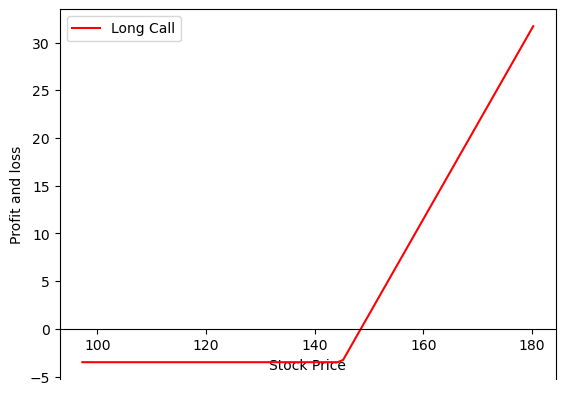

In [5]:
def call_payoff(sT, strike_price, premium):
       return np.where(sT > strike_price, sT - strike_price, 0) - premium
payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call,label='Long Call',color='r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

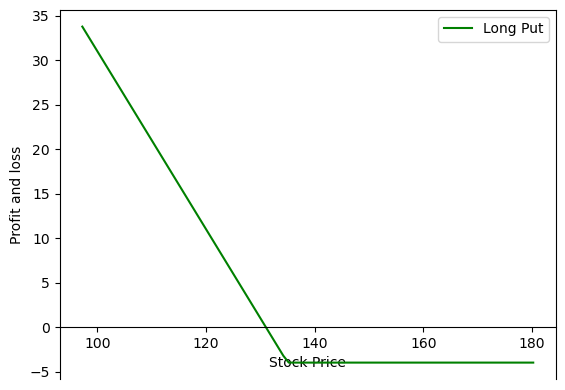

In [6]:
def put_payoff(sT, strike_price, premium):
      return np.where(sT < strike_price, strike_price - sT, 0) - premium
payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)

# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_put,label='Long Put',color='g')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

Max Profit: Unlimited
Max Loss: -7.5


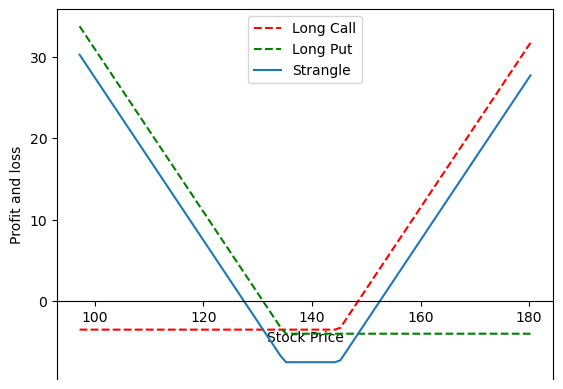

In [7]:
payoff_strangle = payoff_long_call + payoff_long_put

print ("Max Profit: Unlimited")
print ("Max Loss:", min(payoff_strangle))

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')

ax.plot(sT,payoff_long_call,'--',label='Long Call',color='r')
ax.plot(sT,payoff_long_put,'--',label='Long Put',color='g')

ax.plot(sT,payoff_strangle,label='Strangle')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()


In [24]:
#Declaring Parameters (Time is in days)
spot_price1=1280
risk_free_rate1=6.68
time1=22
dividend_yield1=10

spot_price2=1300
risk_free_rate2=6.7
time2=23
dividend_yield2=11

def future(s,r,t,d):
    return s*(1+r*t/36500-d/100)
future_price1=future(spot_price1,risk_free_rate1,time1,dividend_yield1)
future_price2=future(spot_price2,risk_free_rate2,time2,dividend_yield2)

change=future_price2-future_price1

print(change)
print(future_price1)
print(future_price2)

5.334827397260369
1157.1536657534245
1162.488493150685


In [25]:
import sympy as sym
s,r,t,d=sym.symbols('s r t d')
def future(s,r,t,d):
    return s*(1+r*t/36500-d/100)
f=future(s,r,t,d)
fs=f.diff(s)
fr=f.diff(r)
ft=f.diff(t)
fd=f.diff(d)
f1=(fs.subs([(s,spot_price1),(r,risk_free_rate1),(t,time1),(d,dividend_yield1)]).evalf())*(spot_price2-spot_price1)
f2=(fr.subs([(s,spot_price1),(r,risk_free_rate1),(t,time1),(d,dividend_yield1)]).evalf())*(risk_free_rate2-risk_free_rate1)
f3=(ft.subs([(s,spot_price1),(r,risk_free_rate1),(t,time1),(d,dividend_yield1)]).evalf())*(time2-time1)
f4=(fd.subs([(s,spot_price1),(r,risk_free_rate1),(t,time1),(d,dividend_yield1)]).evalf())*(dividend_yield2-dividend_yield1)
f1+f2+f3+f4

5.53021369863013

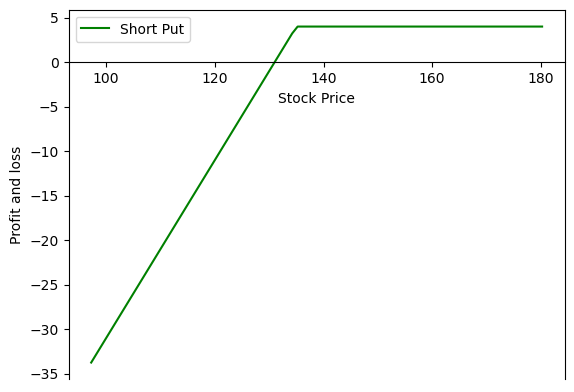

In [10]:
def put_payoff(sT, strike_price, premium):
      return np.where(sT < strike_price,- strike_price + sT, 0) + premium
payoff_short_put = put_payoff(sT, strike_price_short_put, premium_short_put)

# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_put,label='Short Put',color='g')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

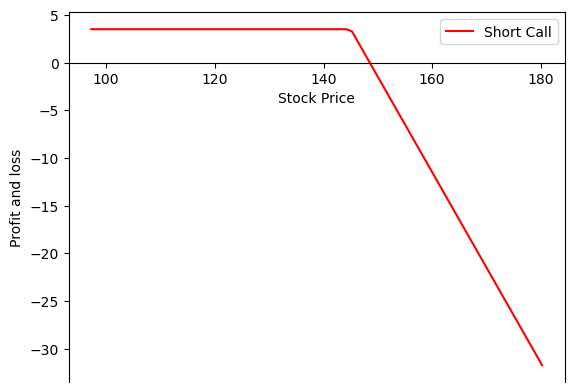

In [11]:
def call_payoff(sT, strike_price, premium):
       return np.where(sT > strike_price, -sT + strike_price, 0) + premium
payoff_short_call = call_payoff(sT, strike_price_short_call, premium_short_call)

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_call,label='Short Call',color='r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

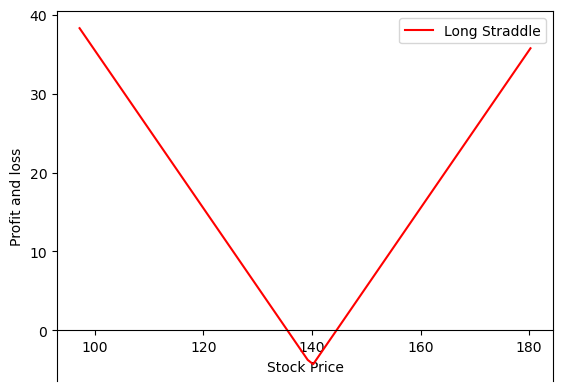

In [21]:
def call_payoff(sT, strike_price, premium):
    return np.where(sT > strike_price, sT - strike_price, - sT + strike_price) - premium
payoff_long_straddle = call_payoff(sT, strike_price_long_straddle, premium_long_straddle)

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_straddle,label='Long Straddle',color='r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()